# -----------------------------------------Face Mask Detection---------------------------------------

## Problem Statement:
- Detection of individuals wearing face masks is crucial for public health and safety.
- Automated face mask detection using deep learning can aid in enforcing mask-wearing protocols.

## Objectives:
1. **Data Preparation:**
   - Import essential libraries.
   - Load a dataset of face images with and without masks.

2. **Data Exploration:**
   - Examine image shapes and visualize random samples to understand data distribution.

3. **Data Preprocessing:**
   - Normalize pixel values for uniformity and better model performance.
   - Prepare dataset for training, validation, and testing.

4. **Model Building:**
   - Define a CNN architecture tailored for face mask detection.
   - Construct model using convolutional, max-pooling, and dropout layers.

5. **Model Training and Evaluation:**
   - Compile model with appropriate settings.
   - Train on training dataset and evaluate on test dataset.
   - Monitor learning progress and performance using visualization techniques.

6. **Model Deployment:**
   - Deploy trained model for real-time face mask detection.
   - Integrate model into applications for enforcing mask-wearing guidelines.


# 1-Importing Libraries

In [57]:
# os module to handle file paths and directories
import os
# OpenCV library for image processing tasks
import cv2
# Random module for generating random numbers
import random
# Pandas library for data manipulation and analysis
import pandas as pd
# Numpy library for numerical computations
import numpy as np
# Matplotlib library for data visualization
import matplotlib.pyplot as plt
# Seaborn library for statistical data visualization
import seaborn as sns
# TensorFlow library for building and training neural networks
import tensorflow as tf
#  Keras module from TensorFlow for building neural network models
from tensorflow import keras
# Layers module from Keras for defining different types of layers in a neural network
from tensorflow.keras import layers
# Sequential class from Keras for creating sequential neural network models
from tensorflow.keras.models import Sequential
# Specific layers from Keras for building the neural network architecture
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
# TensorBoard callback from Keras for monitoring training progress
from tensorflow.keras.callbacks import TensorBoard
# Classification_report function from scikit-learn for evaluating classification models
from sklearn.metrics import classification_report

# 2-Loading Data and Showing image shape

In [58]:
# Function to load data from directory
def load_data_from_directory(directory):
    filepaths = []
    labels = []          # with - without
    folds = os.listdir(directory)   # with - without
    for fold in folds:#[with]
        f_path = os.path.join(directory, fold) #[train\with]
        imgs = os.listdir(f_path)    # image1.jpg
        for img in imgs:
            img_path = os.path.join(f_path, img) # full path of the image (train\wihoutmask\image1.jpg)
            filepaths.append(img_path)
            labels.append(fold)
    return filepaths, labels

In [59]:
# Directories for train, test, and validation data
train_directory = "Face Mask Dataset\Train"
test_directory = "Face Mask Dataset\Test"
validation_directory = "Face Mask Dataset\Validation"

In [60]:
# Load train, test, and validation data
train_filepaths, train_labels = load_data_from_directory(train_directory)
test_filepaths, test_labels = load_data_from_directory(test_directory)
validation_filepaths, validation_labels = load_data_from_directory(validation_directory)

In [61]:
# Create DataFrame for train, test, and validation data
df_train = pd.DataFrame({'filepath': train_filepaths, 'label': train_labels})
df_test = pd.DataFrame({'filepath': test_filepaths, 'label': test_labels})
df_validation = pd.DataFrame({'filepath': validation_filepaths, 'label': validation_labels})

## Shape of images

In [62]:
# Function to load and print shape of images
def print_image_shapes(image_paths):
    for img_path in image_paths:
        img = cv2.imread(img_path)
        if img is not None:
            print("Image shape:", img.shape)
        else:
            print("Error: Unable to load image at path:", img_path)

In [63]:
# Print shapes of images in train, test, and validation sets
print("Train Data:")
print_image_shapes(train_filepaths)
print("\nTest Data:")
print_image_shapes(test_filepaths)
print("\nValidation Data:")
print_image_shapes(validation_filepaths)

Train Data:
Image shape: (82, 82, 3)
Image shape: (25, 25, 3)
Image shape: (50, 50, 3)
Image shape: (53, 53, 3)
Image shape: (37, 37, 3)
Image shape: (78, 78, 3)
Image shape: (116, 116, 3)
Image shape: (32, 32, 3)
Image shape: (57, 57, 3)
Image shape: (56, 56, 3)
Image shape: (105, 105, 3)
Image shape: (60, 60, 3)
Image shape: (178, 178, 3)
Image shape: (58, 58, 3)
Image shape: (57, 57, 3)
Image shape: (102, 102, 3)
Image shape: (146, 146, 3)
Image shape: (100, 100, 3)
Image shape: (71, 71, 3)
Image shape: (71, 71, 3)
Image shape: (67, 67, 3)
Image shape: (72, 72, 3)
Image shape: (100, 100, 3)
Image shape: (30, 30, 3)
Image shape: (39, 39, 3)
Image shape: (99, 99, 3)
Image shape: (81, 81, 3)
Image shape: (118, 118, 3)
Image shape: (63, 63, 3)
Image shape: (61, 61, 3)
Image shape: (60, 60, 3)
Image shape: (77, 77, 3)
Image shape: (148, 148, 3)
Image shape: (152, 152, 3)
Image shape: (142, 142, 3)
Image shape: (102, 102, 3)
Image shape: (81, 81, 3)
Image shape: (79, 79, 3)
Image shape: (

Image shape: (82, 82, 3)
Image shape: (122, 122, 3)
Image shape: (57, 57, 3)
Image shape: (125, 125, 3)
Image shape: (108, 108, 3)
Image shape: (48, 48, 3)
Image shape: (31, 31, 3)
Image shape: (71, 71, 3)
Image shape: (34, 34, 3)
Image shape: (113, 113, 3)
Image shape: (129, 129, 3)
Image shape: (128, 128, 3)
Image shape: (49, 49, 3)
Image shape: (119, 119, 3)
Image shape: (147, 147, 3)
Image shape: (68, 68, 3)
Image shape: (133, 133, 3)
Image shape: (55, 55, 3)
Image shape: (94, 94, 3)
Image shape: (79, 79, 3)
Image shape: (113, 113, 3)
Image shape: (130, 130, 3)
Image shape: (83, 83, 3)
Image shape: (33, 33, 3)
Image shape: (71, 71, 3)
Image shape: (127, 127, 3)
Image shape: (90, 90, 3)
Image shape: (66, 66, 3)
Image shape: (58, 58, 3)
Image shape: (52, 52, 3)
Image shape: (48, 48, 3)
Image shape: (46, 46, 3)
Image shape: (47, 47, 3)
Image shape: (93, 93, 3)
Image shape: (71, 71, 3)
Image shape: (52, 52, 3)
Image shape: (66, 66, 3)
Image shape: (86, 86, 3)
Image shape: (83, 83, 3)
I

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
I

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
I

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
I

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
I

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
I

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
I

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
I

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
I

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
I

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
I

Image shape: (102, 102, 3)
Image shape: (100, 100, 3)
Image shape: (102, 102, 3)
Image shape: (107, 107, 3)
Image shape: (110, 110, 3)
Image shape: (97, 97, 3)
Image shape: (112, 112, 3)
Image shape: (111, 111, 3)
Image shape: (106, 106, 3)
Image shape: (105, 105, 3)
Image shape: (115, 115, 3)
Image shape: (89, 89, 3)
Image shape: (106, 106, 3)
Image shape: (109, 109, 3)
Image shape: (96, 96, 3)
Image shape: (106, 106, 3)
Image shape: (108, 108, 3)
Image shape: (105, 105, 3)
Image shape: (96, 96, 3)
Image shape: (109, 109, 3)
Image shape: (83, 83, 3)
Image shape: (101, 101, 3)
Image shape: (124, 124, 3)
Image shape: (105, 105, 3)
Image shape: (108, 108, 3)
Image shape: (104, 104, 3)
Image shape: (103, 103, 3)
Image shape: (102, 102, 3)
Image shape: (108, 108, 3)
Image shape: (101, 101, 3)
Image shape: (93, 93, 3)
Image shape: (108, 108, 3)
Image shape: (100, 100, 3)
Image shape: (98, 98, 3)
Image shape: (108, 108, 3)
Image shape: (119, 119, 3)
Image shape: (96, 96, 3)
Image shape: (88,

Image shape: (102, 102, 3)
Image shape: (112, 112, 3)
Image shape: (99, 99, 3)
Image shape: (101, 101, 3)
Image shape: (107, 107, 3)
Image shape: (115, 115, 3)
Image shape: (91, 91, 3)
Image shape: (109, 109, 3)
Image shape: (109, 109, 3)
Image shape: (117, 117, 3)
Image shape: (117, 117, 3)
Image shape: (100, 100, 3)
Image shape: (102, 102, 3)
Image shape: (92, 92, 3)
Image shape: (94, 94, 3)
Image shape: (118, 118, 3)
Image shape: (111, 111, 3)
Image shape: (107, 107, 3)
Image shape: (104, 104, 3)
Image shape: (104, 104, 3)
Image shape: (93, 93, 3)
Image shape: (97, 97, 3)
Image shape: (89, 89, 3)
Image shape: (115, 115, 3)
Image shape: (97, 97, 3)
Image shape: (108, 108, 3)
Image shape: (98, 98, 3)
Image shape: (107, 107, 3)
Image shape: (94, 94, 3)
Image shape: (105, 105, 3)
Image shape: (96, 96, 3)
Image shape: (113, 113, 3)
Image shape: (110, 110, 3)
Image shape: (103, 103, 3)
Image shape: (119, 119, 3)
Image shape: (102, 102, 3)
Image shape: (101, 101, 3)
Image shape: (108, 108,

Image shape: (110, 110, 3)
Image shape: (105, 105, 3)
Image shape: (101, 101, 3)
Image shape: (99, 99, 3)
Image shape: (102, 102, 3)
Image shape: (91, 91, 3)
Image shape: (112, 112, 3)
Image shape: (89, 89, 3)
Image shape: (105, 105, 3)
Image shape: (99, 99, 3)
Image shape: (106, 106, 3)
Image shape: (96, 96, 3)
Image shape: (97, 97, 3)
Image shape: (109, 109, 3)
Image shape: (116, 116, 3)
Image shape: (115, 115, 3)
Image shape: (115, 115, 3)
Image shape: (108, 108, 3)
Image shape: (107, 107, 3)
Image shape: (98, 98, 3)
Image shape: (108, 108, 3)
Image shape: (115, 115, 3)
Image shape: (106, 106, 3)
Image shape: (111, 111, 3)
Image shape: (104, 104, 3)
Image shape: (121, 121, 3)
Image shape: (97, 97, 3)
Image shape: (109, 109, 3)
Image shape: (124, 124, 3)
Image shape: (110, 110, 3)
Image shape: (74, 74, 3)
Image shape: (94, 94, 3)
Image shape: (99, 99, 3)
Image shape: (111, 111, 3)
Image shape: (102, 102, 3)
Image shape: (114, 114, 3)
Image shape: (113, 113, 3)
Image shape: (103, 103,

Image shape: (90, 90, 3)
Image shape: (107, 107, 3)
Image shape: (97, 97, 3)
Image shape: (101, 101, 3)
Image shape: (97, 97, 3)
Image shape: (104, 104, 3)
Image shape: (101, 101, 3)
Image shape: (87, 87, 3)
Image shape: (108, 108, 3)
Image shape: (103, 103, 3)
Image shape: (115, 115, 3)
Image shape: (115, 115, 3)
Image shape: (107, 107, 3)
Image shape: (99, 99, 3)
Image shape: (120, 120, 3)
Image shape: (107, 107, 3)
Image shape: (103, 103, 3)
Image shape: (106, 106, 3)
Image shape: (99, 99, 3)
Image shape: (115, 115, 3)
Image shape: (83, 83, 3)
Image shape: (106, 106, 3)
Image shape: (102, 102, 3)
Image shape: (101, 101, 3)
Image shape: (126, 126, 3)
Image shape: (106, 106, 3)
Image shape: (116, 116, 3)
Image shape: (96, 96, 3)
Image shape: (97, 97, 3)
Image shape: (91, 91, 3)
Image shape: (116, 116, 3)
Image shape: (105, 105, 3)
Image shape: (98, 98, 3)
Image shape: (91, 91, 3)
Image shape: (106, 106, 3)
Image shape: (97, 97, 3)
Image shape: (106, 106, 3)
Image shape: (107, 107, 3)


Image shape: (108, 108, 3)
Image shape: (107, 107, 3)
Image shape: (117, 117, 3)
Image shape: (88, 88, 3)
Image shape: (112, 112, 3)
Image shape: (90, 90, 3)
Image shape: (106, 106, 3)
Image shape: (102, 102, 3)
Image shape: (124, 124, 3)
Image shape: (115, 115, 3)
Image shape: (92, 92, 3)
Image shape: (99, 99, 3)
Image shape: (107, 107, 3)
Image shape: (88, 88, 3)
Image shape: (61, 61, 3)
Image shape: (122, 122, 3)
Image shape: (128, 128, 3)
Image shape: (118, 118, 3)
Image shape: (108, 108, 3)
Image shape: (103, 103, 3)
Image shape: (106, 106, 3)
Image shape: (103, 103, 3)
Image shape: (115, 115, 3)
Image shape: (107, 107, 3)
Image shape: (108, 108, 3)
Image shape: (95, 95, 3)
Image shape: (102, 102, 3)
Image shape: (99, 99, 3)
Image shape: (107, 107, 3)
Image shape: (95, 95, 3)
Image shape: (125, 125, 3)
Image shape: (115, 115, 3)
Image shape: (112, 112, 3)
Image shape: (93, 93, 3)
Image shape: (117, 117, 3)
Image shape: (119, 119, 3)
Image shape: (122, 122, 3)
Image shape: (95, 95,

Image shape: (116, 116, 3)
Image shape: (107, 107, 3)
Image shape: (119, 119, 3)
Image shape: (111, 111, 3)
Image shape: (104, 104, 3)
Image shape: (98, 98, 3)
Image shape: (105, 105, 3)
Image shape: (107, 107, 3)
Image shape: (102, 102, 3)
Image shape: (103, 103, 3)
Image shape: (119, 119, 3)
Image shape: (117, 117, 3)
Image shape: (111, 111, 3)
Image shape: (92, 92, 3)
Image shape: (105, 105, 3)
Image shape: (104, 104, 3)
Image shape: (94, 94, 3)
Image shape: (96, 96, 3)
Image shape: (112, 112, 3)
Image shape: (103, 103, 3)
Image shape: (118, 118, 3)
Image shape: (120, 120, 3)
Image shape: (101, 101, 3)
Image shape: (100, 100, 3)
Image shape: (103, 103, 3)
Image shape: (94, 94, 3)
Image shape: (116, 116, 3)
Image shape: (100, 100, 3)
Image shape: (113, 113, 3)
Image shape: (97, 97, 3)
Image shape: (111, 111, 3)
Image shape: (102, 102, 3)
Image shape: (111, 111, 3)
Image shape: (102, 102, 3)
Image shape: (108, 108, 3)
Image shape: (100, 100, 3)
Image shape: (103, 103, 3)
Image shape: 

Image shape: (106, 106, 3)
Image shape: (103, 103, 3)
Image shape: (96, 96, 3)
Image shape: (139, 139, 3)
Image shape: (102, 102, 3)
Image shape: (110, 110, 3)
Image shape: (90, 90, 3)
Image shape: (102, 102, 3)
Image shape: (125, 125, 3)
Image shape: (106, 106, 3)
Image shape: (113, 113, 3)
Image shape: (104, 104, 3)
Image shape: (101, 101, 3)
Image shape: (102, 102, 3)
Image shape: (102, 102, 3)
Image shape: (92, 92, 3)
Image shape: (106, 106, 3)
Image shape: (117, 117, 3)
Image shape: (95, 95, 3)
Image shape: (102, 102, 3)
Image shape: (100, 100, 3)
Image shape: (107, 107, 3)
Image shape: (107, 107, 3)
Image shape: (110, 110, 3)
Image shape: (87, 87, 3)
Image shape: (97, 97, 3)
Image shape: (103, 103, 3)
Image shape: (90, 90, 3)
Image shape: (117, 117, 3)
Image shape: (129, 129, 3)
Image shape: (111, 111, 3)
Image shape: (110, 110, 3)
Image shape: (106, 106, 3)
Image shape: (106, 106, 3)
Image shape: (111, 111, 3)
Image shape: (88, 88, 3)
Image shape: (111, 111, 3)
Image shape: (110

Image shape: (108, 108, 3)
Image shape: (95, 95, 3)
Image shape: (96, 96, 3)
Image shape: (91, 91, 3)
Image shape: (102, 102, 3)
Image shape: (100, 100, 3)
Image shape: (99, 99, 3)
Image shape: (97, 97, 3)
Image shape: (131, 131, 3)
Image shape: (116, 116, 3)
Image shape: (101, 101, 3)
Image shape: (116, 116, 3)
Image shape: (105, 105, 3)
Image shape: (103, 103, 3)
Image shape: (96, 96, 3)
Image shape: (104, 104, 3)
Image shape: (111, 111, 3)
Image shape: (97, 97, 3)
Image shape: (107, 107, 3)
Image shape: (104, 104, 3)
Image shape: (104, 104, 3)
Image shape: (111, 111, 3)
Image shape: (109, 109, 3)
Image shape: (112, 112, 3)
Image shape: (110, 110, 3)
Image shape: (84, 84, 3)
Image shape: (106, 106, 3)
Image shape: (110, 110, 3)
Image shape: (108, 108, 3)
Image shape: (106, 106, 3)
Image shape: (101, 101, 3)
Image shape: (112, 112, 3)
Image shape: (115, 115, 3)
Image shape: (99, 99, 3)
Image shape: (99, 99, 3)
Image shape: (93, 93, 3)
Image shape: (98, 98, 3)
Image shape: (110, 110, 3

Image shape: (109, 109, 3)
Image shape: (112, 112, 3)
Image shape: (109, 109, 3)
Image shape: (110, 110, 3)
Image shape: (103, 103, 3)
Image shape: (95, 95, 3)
Image shape: (106, 106, 3)
Image shape: (100, 100, 3)
Image shape: (106, 106, 3)
Image shape: (119, 119, 3)
Image shape: (101, 101, 3)
Image shape: (114, 114, 3)
Image shape: (103, 103, 3)
Image shape: (103, 103, 3)
Image shape: (102, 102, 3)
Image shape: (113, 113, 3)
Image shape: (108, 108, 3)
Image shape: (105, 105, 3)
Image shape: (104, 104, 3)
Image shape: (106, 106, 3)
Image shape: (114, 114, 3)
Image shape: (114, 114, 3)
Image shape: (112, 112, 3)
Image shape: (84, 84, 3)
Image shape: (105, 105, 3)
Image shape: (119, 119, 3)
Image shape: (109, 109, 3)
Image shape: (119, 119, 3)
Image shape: (106, 106, 3)
Image shape: (111, 111, 3)
Image shape: (105, 105, 3)
Image shape: (101, 101, 3)
Image shape: (105, 105, 3)
Image shape: (118, 118, 3)
Image shape: (99, 99, 3)
Image shape: (85, 85, 3)
Image shape: (91, 91, 3)
Image shape

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
I

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
I

In [64]:
temp = validation_filepaths + test_filepaths + train_filepaths

sizes = []
for i in temp:
    img = cv2.imread(i)
    sizes.append(img.shape)

pd.Series(sizes).value_counts()

(224, 224, 3)    4990
(107, 107, 3)     276
(105, 105, 3)     272
(106, 106, 3)     261
(102, 102, 3)     258
                 ... 
(151, 151, 3)       1
(168, 168, 3)       1
(155, 155, 3)       1
(284, 284, 3)       1
(156, 156, 3)       1
Name: count, Length: 142, dtype: int64

# 3-Data preprocessing

## Rescaling 

In [65]:
# Define rescaling layer
rescale = layers.Rescaling(1./255)
# Norm [0,255] ==> [0,1] // improve performance training

In [66]:
# Load train dataset with rescaling
train_ds = keras.utils.image_dataset_from_directory(
    directory="Face Mask Dataset\Train",
    batch_size=32,
    image_size=(224, 224),
    label_mode='binary',  # Assuming you have binary classification
)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))  # Apply rescaling


Found 10000 files belonging to 2 classes.


In [67]:
# Load validation dataset with rescaling
validation_ds = keras.utils.image_dataset_from_directory(
    directory="Face Mask Dataset\Validation",
    batch_size=32,       # processing concuruntly
    image_size=(224, 224),
    label_mode='binary',  # Assuming you have binary classification
)
validation_ds = validation_ds.map(lambda x, y: (rescale(x), y))  # Apply rescaling


Found 800 files belonging to 2 classes.


In [68]:
# Load and preprocess test dataset
test_ds = (
    keras.utils.image_dataset_from_directory(
        directory="Face Mask Dataset\Test",
        batch_size=32,
        image_size=(224, 224),
        label_mode='binary',
        shuffle=False
    )
    .map(lambda x, y: (rescale(x), y))
)


Found 992 files belonging to 2 classes.


# 4-Visualizing Data

## Train Data

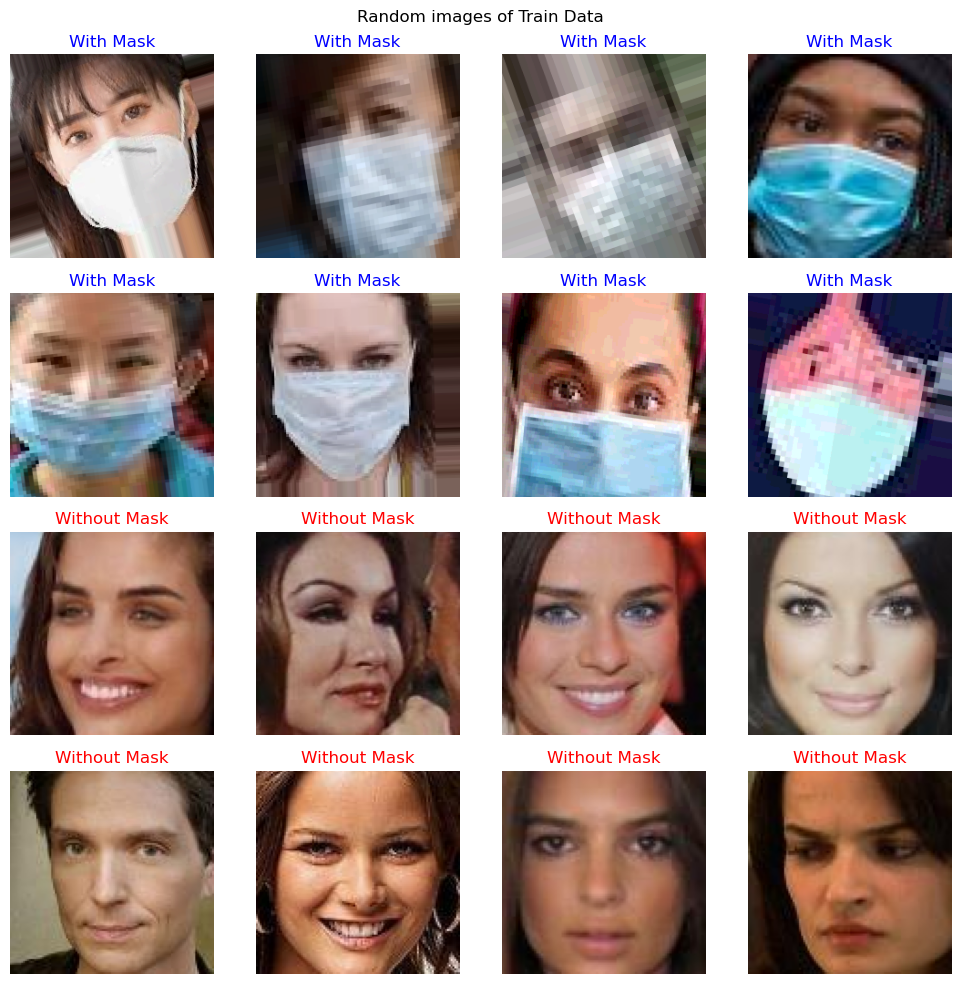

In [69]:
# Directory paths for images with mask and without mask
with_mask_path = "Face Mask Dataset\Train/WithMask"
without_mask_path ="Face Mask Dataset\Train/WithoutMask"

# Function to sample images from a directory
def sample_images(directory, num_samples):
    images = [os.path.join(directory, file) for file in os.listdir(directory)]
    return random.sample(images, min(num_samples, len(images)))

# Sample images from each category
with_mask_img_paths = sample_images(with_mask_path, 8)
without_mask_img_paths = sample_images(without_mask_path, 8)

# Load and display images in subplots
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through images with mask
for i, img_path in enumerate(with_mask_img_paths):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB
    axes[i//4, i%4].imshow(img)
    axes[i//4, i%4].set_title("With Mask",color= 'blue')
    axes[i//4, i%4].axis('off')

# Loop through images without mask
for i, img_path in enumerate(without_mask_img_paths):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB
    axes[2+(i//4), i%4].imshow(img)
    axes[2+(i//4), i%4].set_title("Without Mask",color='red')
    axes[2+(i//4), i%4].axis('off')

plt.suptitle('Random images of Train Data')
plt.tight_layout()
plt.show()

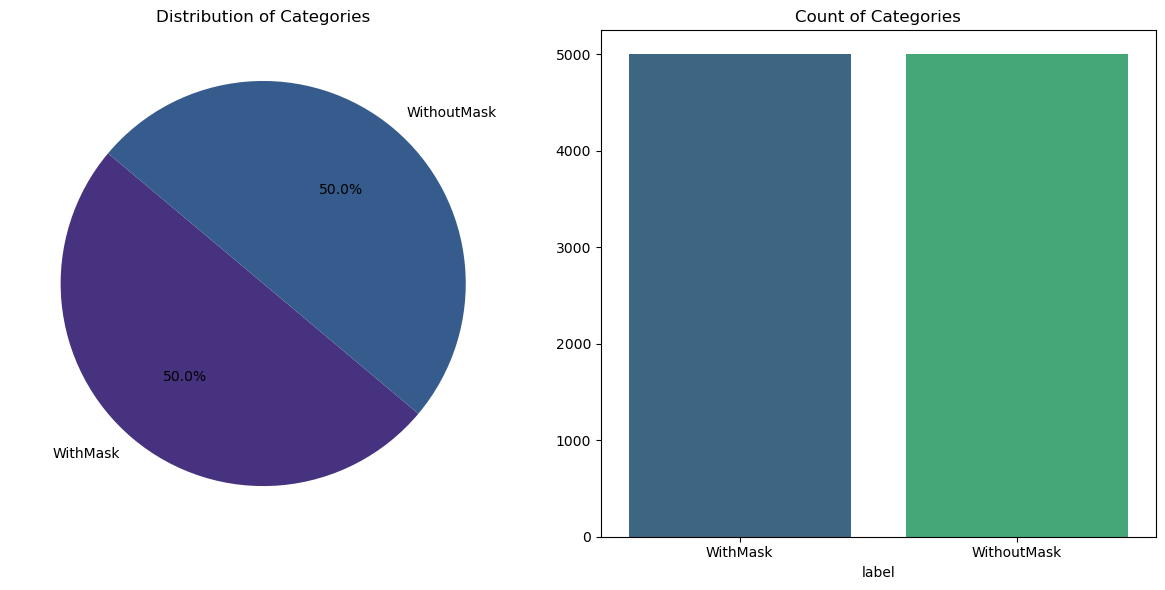

In [70]:
# Count the occurrences of each category in the 'category' column
count = df_train['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

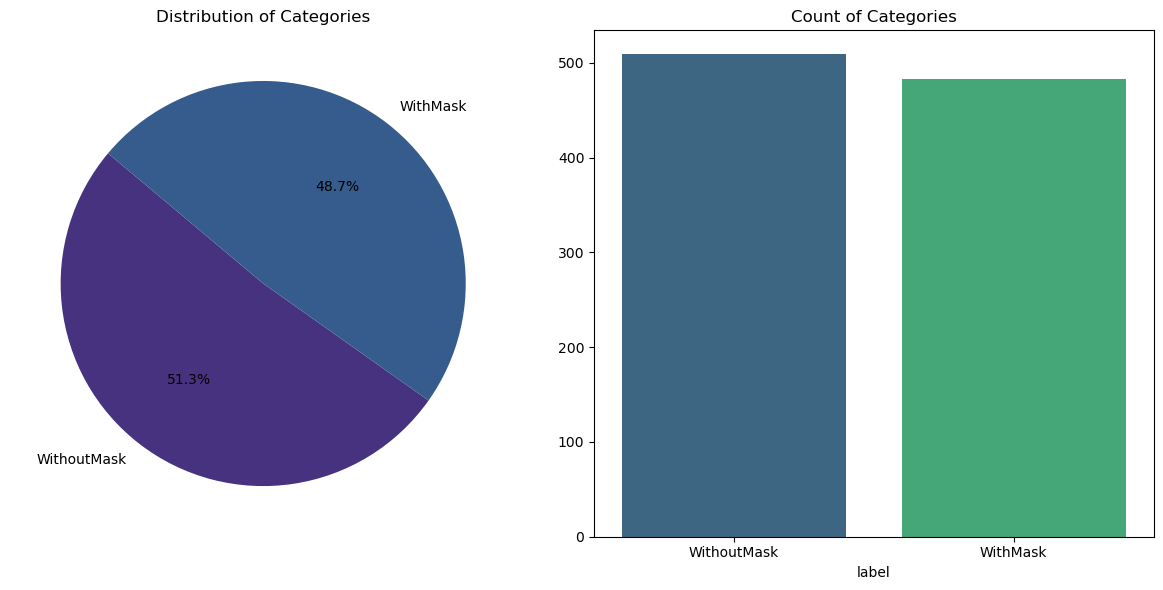

In [71]:
# Count the occurrences of each category in the 'category' column
count = df_test['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# 5-Build the Model

In [72]:
# Define input layer
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))

# Define model architecture
model = tf.keras.models.Sequential([
    input_layer,
    # Convolutional layer with 32 filters and 3x3 kernel size, using ReLU activation
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer
    tf.keras.layers.MaxPooling2D(),
    # Convolutional layer with 32 filters and 3x3 kernel size, using ReLU activation
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer
    tf.keras.layers.MaxPooling2D(),
    # Convolutional layer with 32 filters and 3x3 kernel size, using ReLU activation
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer
    tf.keras.layers.MaxPooling2D(),
    # Flatten layer to convert 2D data to 1D
    tf.keras.layers.Flatten(),
    # Dropout Layer
    tf.keras.layers.Dropout(0.5),
    # Output layer with 1 unit and sigmoid activation for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')

])

## Summary of the Model

In [73]:
# Display the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        21,633 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,025 (160.25 KB)

 Trainable params: 41,025 (160.25 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# Compile the model
model.compile(optimizer='adam',
               loss='binary_crossentropy',  # Use binary crossentropy for two classes
              metrics=['accuracy'])

In [75]:
# Define early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
# Define early stopping callback
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Fit the model with callbacks
history = model.fit(train_ds, validation_data=validation_ds, epochs=5, callbacks=[early_stopping])

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 251ms/step - accuracy: 0.8927 - loss: 0.2344 - val_accuracy: 0.9812 - val_loss: 0.0631
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 86s 275ms/step - accuracy: 0.9797 - loss: 0.0629 - val_accuracy: 0.9875 - val_loss: 0.0388
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 85s 272ms/step - accuracy: 0.9844 - loss: 0.0412 - val_accuracy: 0.9925 - val_loss: 0.0190
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 86s 274ms/step - accuracy: 0.9879 - loss: 0.0346 - val_accuracy: 0.9887 - val_loss: 0.0443
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 87s 277ms/step - accuracy: 0.9886 - loss: 0.0368 - val_accuracy: 0.9925 - val_loss: 0.0171


In [76]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds) 

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9911 - loss: 0.0321
Test Loss: 0.03267570585012436
Test Accuracy: 0.992943525314331


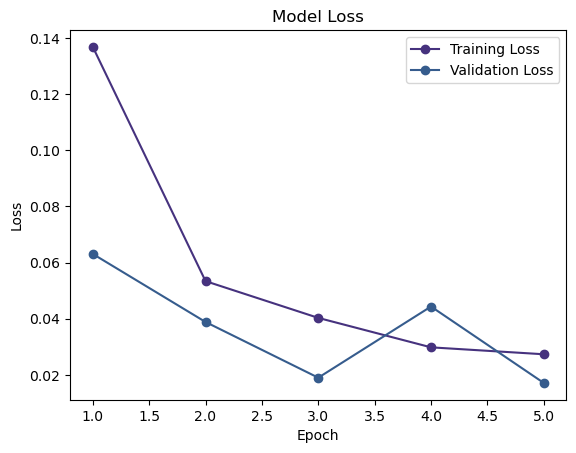

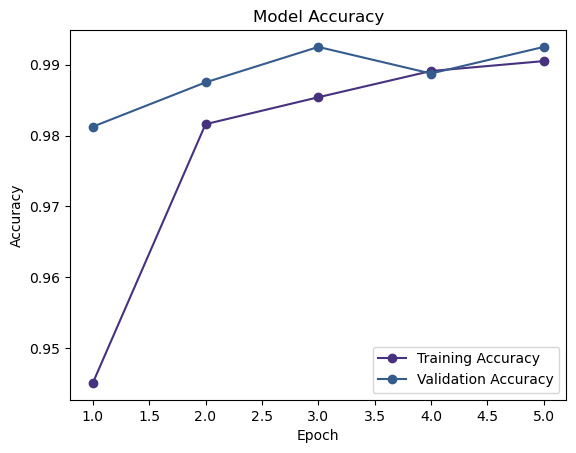

In [77]:
# Define epochs
epochs = range(1, len(history.history['loss']) + 1)

# Plot training & validation loss
plt.plot(epochs, history.history['loss'], label='Training Loss', marker='o')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Conclusion:

In conclusion, this Jupyter Notebook serves as a comprehensive guide to building a face mask detection model using deep learning techniques. With the ongoing emphasis on public health and safety, the detection of individuals wearing face masks has become increasingly important in various settings such as hospitals, public transportation, and public gatherings. Leveraging the power of deep learning, this notebook provides step-by-step instructions on constructing a robust model capable of accurately detecting the presence or absence of face masks in images.

By following the outlined procedures, users can:
- Load and preprocess face mask datasets for training, validation, and testing.
- Construct a convolutional neural network (CNN) architecture tailored for face mask detection.
- Train and evaluate the model to assess its performance on unseen data.
- Visualize training history to monitor the model's learning progress and performance.
- Deploy the trained model for real-time face mask detection tasks.

Overall, this notebook aims to contribute to public health efforts by enabling the development of reliable face mask detection systems that can help enforce mask-wearing protocols and mitigate the spread of infectious diseases in various settings.
